In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8) # Adjust Configuration of the plots we will create

In [69]:
# Read in the Data 
data=pd.read_csv(r'C:\Users\moham\Desktop\Jobs\Data Analyst Project\Project -3\movies.csv')
data.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


#### Data Cleaning

In [3]:
## Missing Values

for col in df.columns:
        pct_missing = np.mean(df[col].isnull())
        print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
df.shape

(7668, 15)

In [5]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [6]:
## Data Types 
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
## Handle missing values

df['rating'].fillna(df['rating'].mode()[0], inplace=True)  # Fill missing ratings with the most common value
df['budget'].fillna(df['budget'].median(), inplace=True)   # Fill missing budgets with the median
df['released'].fillna(df['released'].mode()[0], inplace=True)  # Fill missing release dates with mode
df['gross'].fillna(df['gross'].mode()[0], inplace=True)  # Fill missing ratings with the most common value

In [8]:
df.dropna(subset=['votes', 'score', 'writer','company', 'runtime', 'country','star'], inplace=True)  # Drop rows where these columns have nulls

In [9]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [10]:
# Changing Data Type
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [13]:
# Step 1: Ensure the 'released' column is treated as string
df['released'] = df['released'].astype(str)

# Step 2: Remove any text in parentheses
df['released_clean'] = df['released'].str.replace(r"\(.*\)", "", regex=True).str.strip()

# Step 3: Convert the cleaned 'released' column to datetime
df['released_clean'] = pd.to_datetime(df['released_clean'], format="%B %d, %Y", errors='coerce')

# Step 4: Extract the year from the datetime
df['yearCorrect'] = df['released_clean'].dt.year


In [27]:
df['yearCorrect'].isnull().sum()

56

In [28]:
df.dropna(subset=['yearCorrect'], inplace=True)

In [29]:
df['yearCorrect'] = df['yearCorrect'].astype('int64')

In [30]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearCorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [41]:
df = df.sort_values(by=['gross'],inplace=False,ascending=False)

In [38]:
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearCorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000.0,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137.0,2015
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000.0,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103.0,2019


In [ ]:
#pd.set_option('display.max_rows',None) To see all the values

In [37]:
## Drop Duplicates
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
5813                        10 West Studios
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 2353, dtype: object

In [39]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearCorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,20500000,1400,British Broadcasting Corporation (BBC),103.0,2001
7625,The Untold Story,R,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,20500000,790,Visual Arts Entertainment,104.0,2019
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,20500000,682,Roxwell Films,93.0,2020
2417,Madadayo,R,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,1993


In [ ]:
# Budget high Correlation
# Company high Correlation

<function matplotlib.pyplot.show(close=None, block=None)>

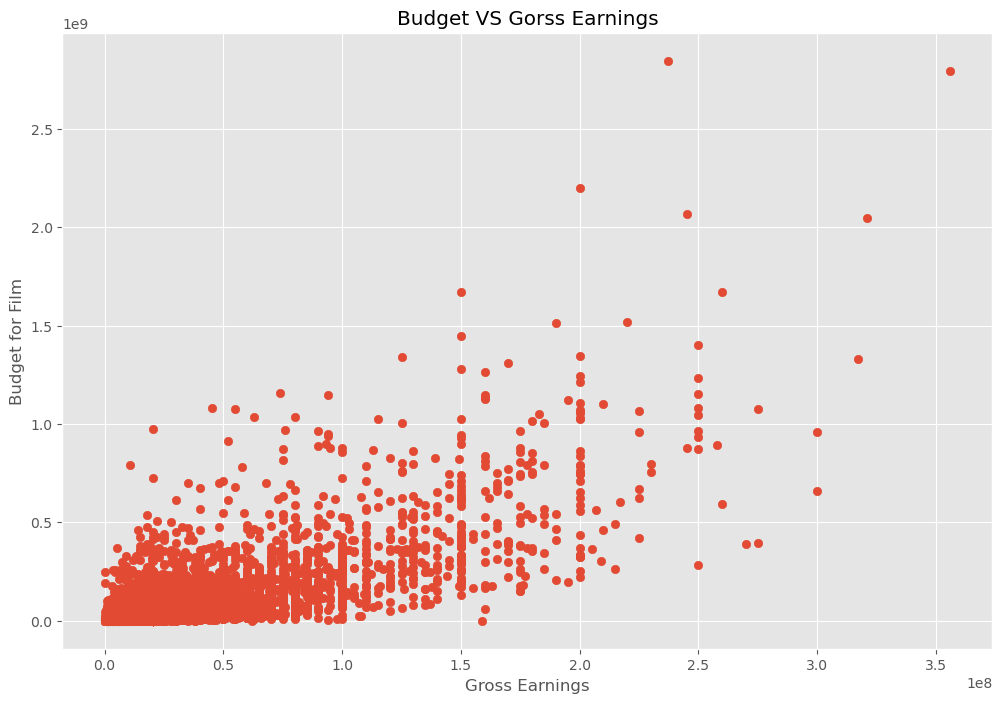

In [43]:
## Scatter Plot with Budget vs Gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget VS Gorss Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show

In [42]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearCorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,20500000,1400,British Broadcasting Corporation (BBC),103.0,2001
7625,The Untold Story,R,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,20500000,790,Visual Arts Entertainment,104.0,2019
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,20500000,682,Roxwell Films,93.0,2020
2417,Madadayo,R,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,1993


<Axes: xlabel='budget', ylabel='gross'>

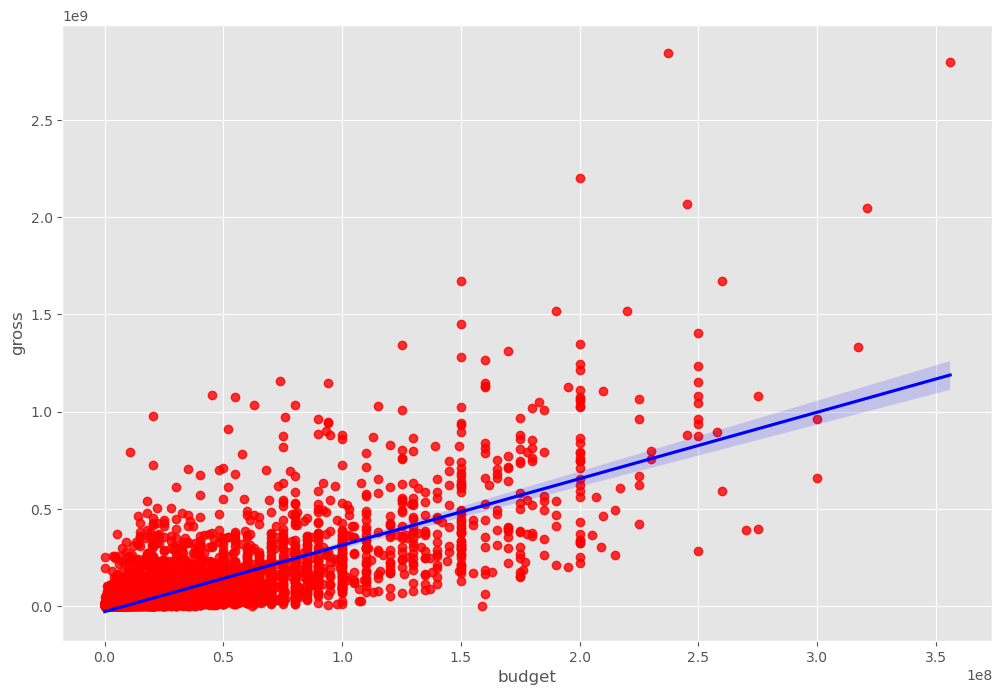

In [45]:
## Plot budget vs gross in seaborn

sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [47]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearCorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,20500000,1400,British Broadcasting Corporation (BBC),103.0,2001
7625,The Untold Story,R,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,20500000,790,Visual Arts Entertainment,104.0,2019
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,20500000,682,Roxwell Films,93.0,2020
2417,Madadayo,R,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,1993


In [48]:
#Lets Start Looking at Correlation

df.corr()

ValueError: could not convert string to float: 'Avatar'

In [55]:
# Correct way to select multiple columns
df_numeric = df[['budget', 'gross', 'runtime', 'score', 'votes', 'year']]


In [61]:
df_numeric.corr(method='pearson') #Person,kendall,Spearman

,budget,gross,runtime,score,votes,year
budget,1.000000,0.745853,0.272763,0.061637,0.459880,0.291937
gross,0.745853,1.000000,0.244281,0.186773,0.631708,0.259178
runtime,0.272763,0.244281,1.000000,0.401209,0.308876,0.119354
score,0.061637,0.186773,0.401209,1.000000,0.411727,0.100629
votes,0.459880,0.631708,0.308876,0.411727,1.000000,0.220880
year,0.291937,0.259178,0.119354,0.100629,0.220880,1.000000


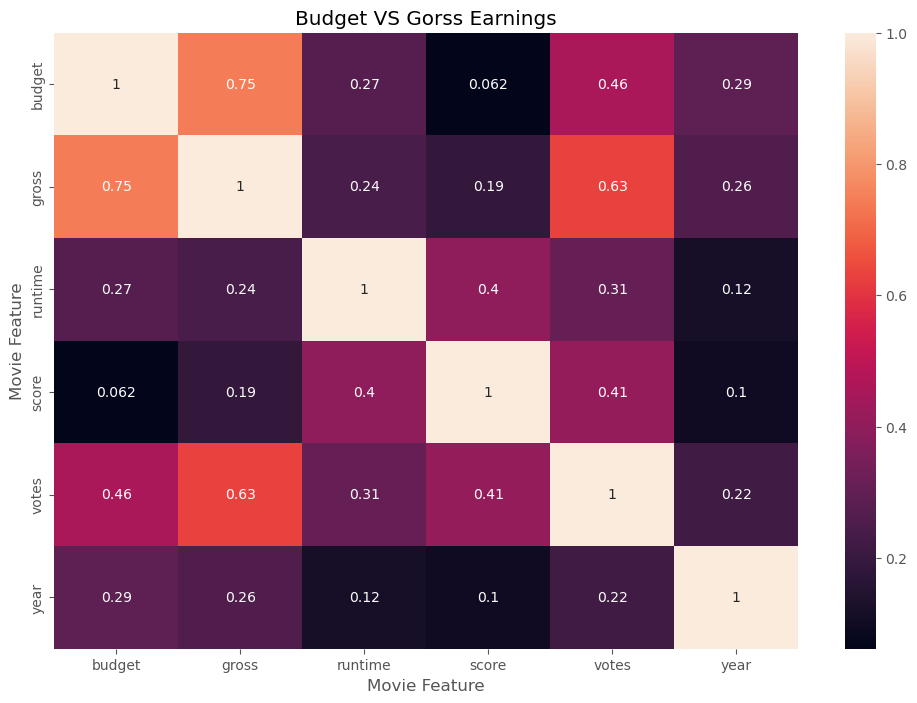

In [66]:
correlation_matrix = df_numeric.corr(method='pearson')

sns.heatmap(correlation_matrix,annot=True)
plt.title('Budget VS Gorss Earnings')
plt.xlabel('Movie Feature')
plt.ylabel('Movie Feature')

plt.show()

In [67]:
## Look at compnay] 
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearCorrect
5445,531,5,0,2009,678,7.8,1100000.0,1145,1764,2295,55,237000000,2847246203,2222,162.0,2009
7445,533,5,0,2019,169,8.4,903000.0,162,733,2202,55,356000000,2797501328,1581,181.0,2019
3045,6821,5,6,1997,686,7.8,1100000.0,1145,1764,1566,55,200000000,2201647264,2222,194.0,1997
6663,5090,5,0,2015,680,7.8,876000.0,1116,2530,513,55,245000000,2069521700,1515,138.0,2015
7244,534,5,0,2018,178,8.4,897000.0,162,733,2202,55,321000000,2048359754,1581,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,3329,6,4,2000,1096,6.5,5200.0,726,1112,2280,54,20500000,1400,471,103.0,2001
7625,6647,6,4,2019,1126,5.7,320.0,2524,2545,1884,55,20500000,790,2277,104.0,2019
7580,4616,3,5,2019,1804,5.2,735.0,1433,2186,2239,55,20500000,682,1963,93.0,2020
2417,3374,6,6,1993,75,7.3,5100.0,33,1704,2523,27,11900000,596,784,134.0,1993


In [71]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


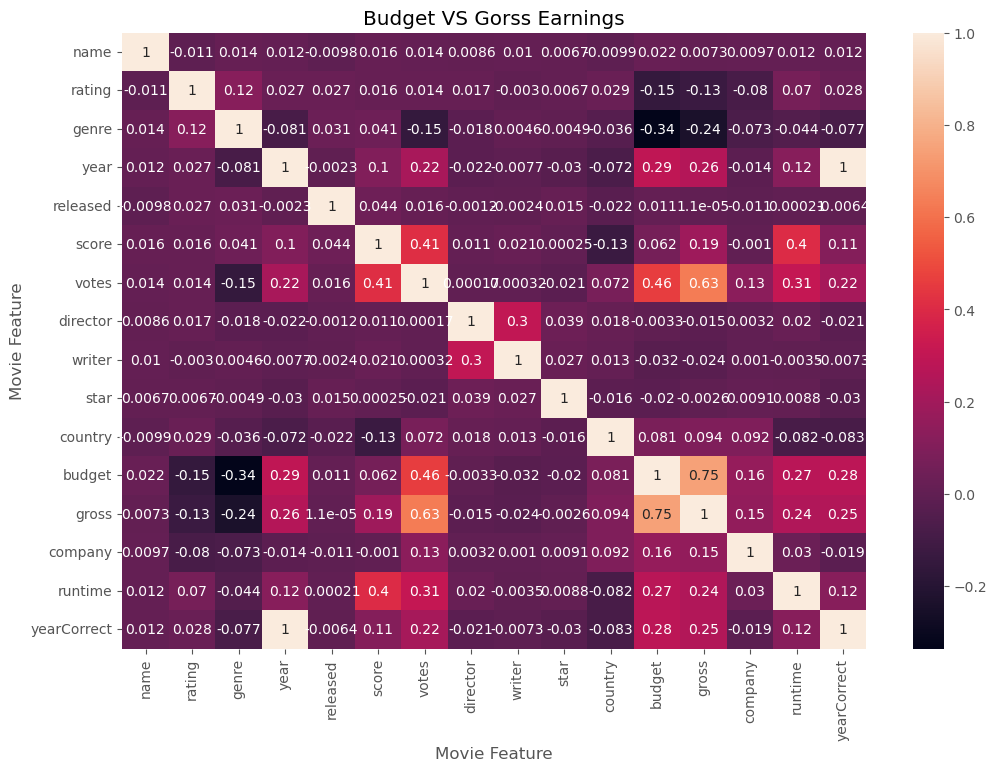

In [72]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix,annot=True)
plt.title('Budget VS Gorss Earnings')
plt.xlabel('Movie Feature')
plt.ylabel('Movie Feature')

plt.show()

In [73]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearCorrect
name,1.000000,-0.011124,0.014225,0.012288,-0.009769,0.016314,0.013532,0.008551,0.010160,0.006678,-0.009860,0.021596,0.007255,0.009743,0.011761,0.011927
rating,-0.011124,1.000000,0.121950,0.027426,0.026597,0.015773,0.014065,0.016814,-0.003010,0.006702,0.028545,-0.148419,-0.131131,-0.080066,0.070415,0.028053
genre,0.014225,0.121950,1.000000,-0.080604,0.030589,0.040718,-0.148709,-0.017860,0.004647,-0.004945,-0.036006,-0.335447,-0.240447,-0.073246,-0.044418,-0.076886
year,0.012288,0.027426,-0.080604,1.000000,-0.002313,0.100629,0.220880,-0.022161,-0.007656,-0.029760,-0.072442,0.291937,0.259178,-0.014019,0.119354,0.997583
released,-0.009769,0.026597,0.030589,-0.002313,1.000000,0.044127,0.015667,-0.001219,-0.002354,0.014802,-0.022453,0.011090,0.000011,-0.011004,0.000213,-0.006380
score,0.016314,0.015773,0.040718,0.100629,0.044127,1.000000,0.411727,0.010648,0.021181,0.000253,-0.129828,0.061637,0.186773,-0.001048,0.401209,0.108296
votes,0.013532,0.014065,-0.148709,0.220880,0.015667,0.411727,1.000000,0.000168,0.000324,-0.020716,0.072344,0.459880,0.631708,0.130324,0.308876,0.216504
director,0.008551,0.016814,-0.017860,-0.022161,-0.001219,0.010648,0.000168,1.000000,0.296628,0.039056,0.018308,-0.003279,-0.015355,0.003164,0.019558,-0.021453
writer,0.010160,-0.003010,0.004647,-0.007656,-0.002354,0.021181,0.000324,0.296628,1.000000,0.026751,0.012715,-0.031665,-0.023632,0.001030,-0.003451,-0.007275
star,0.006678,0.006702,-0.004945,-0.029760,0.014802,0.000253,-0.020716,0.039056,0.026751,1.000000,-0.015582,-0.020379,-0.002609,0.009075,0.008791,-0.030067


In [75]:
##Unstacking

correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.011124
             genre          0.014225
             year           0.012288
             released      -0.009769
                              ...   
yearCorrect  budget         0.284383
             gross          0.252356
             company       -0.018951
             runtime        0.119115
             yearCorrect    1.000000
Length: 256, dtype: float64

In [76]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.335447
budget       genre         -0.335447
genre        gross         -0.240447
gross        genre         -0.240447
genre        votes         -0.148709
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearCorrect  yearCorrect    1.000000
Length: 256, dtype: float64

In [77]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross        votes          0.631708
votes        gross          0.631708
gross        budget         0.745853
budget       gross          0.745853
yearCorrect  year           0.997583
year         yearCorrect    0.997583
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearCorrect  yearCorrect    1.000000
dtype: float64

In [ ]:
## Votes and Budget have the highest Correlation to gross earnings

#Compnay has Low Correlation

